## **ANÁLISIS DESCRIPTIVO Y EXPLORATORIO**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

1. periodo: El periodo al que pertenece el registro de datos.
1. cod_sub: Código de subespecialidad médica.
1. des_sub: Descripción de la subespecialidad médica.
1. dni_pro: DNI (Documento Nacional de Identidad) del profesional médico.
1. nom_pro: Nombre del profesional médico.
1. fec_cit: Fecha de la cita.
1. hor_cit: Hora de la cita.
1. act_med: Acto Medico
1. dni_pac: DNI del paciente.
1. nom_pac: Nombre del paciente.
1. edad: Edad del paciente.
1. sexo: Género del paciente.
1. cod_est: Código de estado.
1. des_est: Descripción del estado.
1. cod_tpa: Código de tipo de paciente.
1. des_tpa: Descripción del tipo de paciente.
1. fec_sol: Fecha de solicitud.
1. cod_tci: Código de tipo de cita.
1. des_tci: Descripción del tipo de cita.
1. cod_pro: Código de procedimiento.
1. cod_ads: Código de administración de servicios.
1. tip_seg: Tipo de seguro.
1. nrc_ser: NRC (Número de Registro de Consulta) del servicio.
1. nrc_est: NRC del establecimiento.
1. hor_ini: Hora de inicio.
1. hor_fin: Hora de finalización.
1. turno: Turno de la cita.
1. cod_tpr: Código de tipo de prestación.
1. des_tpr: Descripción del tipo de prestación.
1. colegio: Colegio al que pertenece el profesional médico.
1. cod_cci: Código de centro de costos.
1. des_cci: Descripción del centro de costos.
1. cod_oto: Código de otorgamiento.
1. des_oto: Descripción del otorgamiento.
1. res_ate: Resultado de la atención médica.
1. hor_cre: Hora de creación.
1. diferi: FALTA
1. cod_esp: Código de especialidad.
1. cod_agr: Código de acuerdo.
1. ser_agr: Servicio de acuerdo.
1. adu_ped: FALTA

In [2]:
#df = pd.read_excel("/home/ugadingenieria01/Descargas/cexreba2122.xlsx")
#df.to_csv("DATA_REGRESION.csv",index=False)
df = pd.read_csv("DATA_REGRESION.csv", index_col=False)

/tmp/ipykernel_3580374/2782894821.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("DATA_REGRESION.csv", index_col=False)


In [4]:
df.columns

Index(['periodo', 'cod_sub', 'des_sub', 'dni_pro', 'nom_pro', 'fec_cit',
       'hor_cit', 'act_med', 'dni_pac', 'nom_pac', 'edad', 'sexo', 'cod_est',
       'des_est', 'cod_tpa', 'des_tpa', 'fec_sol', 'cod_tci', 'des_tci',
       'cod_pro', 'cod_ads', 'tip_seg', 'nrc_ser', 'nrc_est', 'hor_ini',
       'hor_fin', 'turno', 'cod_tpr', 'des_tpr', 'colegio', 'cod_cci',
       'des_cci', 'cod_oto', 'des_oto', 'res_ate', 'hor_cre', 'diferi',
       'cod_esp', 'cod_agr', 'ser_agr', 'adu_ped'],
      dtype='object')

#### **ELIMINAREMOS LAS COLUMNAS QUE NO APORTARÁN AL MODELO:**
1. dni_pro: DNI (Documento Nacional de Identidad) del profesional médico.
1. nom_pro: Nombre del profesional médico.
1. act_med: Acto Medico
1. dni_pac: DNI del paciente.
1. nom_pac: Nombre del paciente.
1. colegio: Colegio al que pertenece el profesional médico.
1. des_sub: Descripción de la subespecialidad médica.
1. des_est: Descripción del estado.
1. des_tci: Descripción del tipo de cita.
1. des_tpr: Descripción del tipo de prestación.
1. des_cci: Descripción del centro de costos.
1. des_oto: Descripción del otorgamiento.
1. ser_agr: Servicio de acuerdo.
1. cod_cci: Código de centro de costos.





In [5]:
df = df.drop(['dni_pro', 'nom_pro', 'act_med', 'dni_pac', 'nom_pac','colegio','ser_agr','cod_cci'], axis=1)
df = df.drop(['des_sub', 'des_est', 'des_tpa', 'des_tci', 'des_tpr','des_cci','des_oto'], axis=1)

In [6]:
#VIENDO UNICOS
columns=df.columns
for i in columns:
    print(i)
    print(df[i].unique())

periodo
[202205 202206 202207 202208 202210 202209 202211 202201 202202 202204
 202212 202101 202107 202106 202110 202108 202109 202111 202112 202203
 202104 202105 202103 202102]
cod_sub
[  1 602 620 625 513 671 618 269  69 551 503 658 622 599 526 627 318 637
 274 565 641 272 319 621 604 600 601 560 629 511  32 590 518 593   3 523
 608  87  63 615 564 650 314 469 652 547 634 519 617 663 651 166 649  68
 170 654 591 635 630 572 545 648 320 647 558 478 679 639 626 645 512 640
 624 603 270 594]
fec_cit
['2022-05-05' '2022-05-20' '2022-05-10' '2022-05-25' '2022-05-18'
 '2022-05-26' '2022-05-13' '2022-05-12' '2022-05-16' '2022-05-03'
 '2022-05-27' '2022-05-24' '2022-05-09' '2022-05-04' '2022-05-02'
 '2022-05-17' '2022-05-06' '2022-05-19' '2022-05-07' '2022-05-11'
 '2022-05-31' '2022-05-30' '2022-05-23' '2022-05-28' '2022-05-21'
 '2022-05-14' '2022-06-06' '2022-06-28' '2022-06-27' '2022-06-09'
 '2022-06-14' '2022-06-07' '2022-06-20' '2022-06-02' '2022-06-21'
 '2022-06-15' '2022-06-23' '2022

## **FEATURE ENGINEERING**

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Convertimos las horas en decimal
def time_to_decimal(t):
    hours, minutes = map(int, t.split(':'))
    if minutes == 0:
        return hours
    else:
        return hours + minutes/60

df['hor_cit'] = df['hor_cit'].apply(time_to_decimal)
df['hor_ini'] = df['hor_ini'].apply(time_to_decimal)
df['hor_fin'] = df['hor_fin'].apply(time_to_decimal)
df['hor_cre'] = df['hor_cre'].apply(time_to_decimal)


# Codificar 'sexo' utilizando LabelEncoder
le = LabelEncoder()
df['sexo'] = le.fit_transform(df['sexo'])

# One-Hot Encoding para 'cod_tpa'
df = pd.concat([df, pd.get_dummies(df['cod_tpa'], prefix='cod_tpa')], axis=1)
df.drop('cod_tpa', axis=1, inplace=True)

# One-Hot Encoding para 'cod_tci'
df = pd.concat([df, pd.get_dummies(df['cod_tci'], prefix='cod_tci')], axis=1)
df.drop('cod_tci', axis=1, inplace=True)

# Separamos las fechas en dia, mes y año
df['fec_cit'] = pd.to_datetime(df['fec_cit'])
df['fec_sol'] = pd.to_datetime(df['fec_sol'],errors='coerce')

df['fec_cit_day'] = df['fec_cit'].dt.day
df['fec_cit_month'] = df['fec_cit'].dt.month
df['fec_cit_year'] = df['fec_cit'].dt.year

df['fec_sol_day'] = df['fec_sol'].dt.day
df['fec_sol_month'] = df['fec_sol'].dt.month
df['fec_sol_year'] = df['fec_sol'].dt.year
df = df.drop(['fec_cit', 'fec_sol'], axis=1)


# Separamos el periodo en mes y año
df['periodo_año'] = df['periodo'].apply(lambda x: str(x)[:4])
df['periodo_mes'] = df['periodo'].apply(lambda x: str(x)[4:])
df['periodo_año'] = df['periodo_año'].astype(int)
df['periodo_mes'] = df['periodo_mes'].astype(int)
df = df.drop(['periodo'], axis=1)

#### **SEPARAREMOS LAS EDADES EN GRUPOS**
- Infantil: Menores de 12 años.
- Adolescente: Adolescentes entre 12 y 18 años (incluyendo 12 y excluyendo 18).
- Adulto: Adultos entre 18 y 65 años (incluyendo 18 y excluyendo 65).
- Adulto mayor: Adultos mayores de 65 años (incluyendo 65).

In [8]:
# Separamos las edades en grupos
bins = [0, 12, 18, 65, 100]
labels = ['infantil', 'adolescente', 'adulto', 'adulto mayor']
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels)

# Ahora aplicamos Label Encoding a 'grupo_edad'
label_encoder = LabelEncoder()
df['grupo_edad'] = label_encoder.fit_transform(df['grupo_edad'])

label_encoder = LabelEncoder()
df['nrc_ser'] = label_encoder.fit_transform(df['nrc_ser'])
df['nrc_est'] = label_encoder.fit_transform(df['nrc_est'])
df['cod_agr'] = label_encoder.fit_transform(df['cod_agr'])

#### **SEPARAREMOS LOS TURNOS EN GRUPOS**
- Mañana: 06:00-12:00
- Tarde: 12:00-18:00
- Noche: 18:00-24:00

In [9]:
def label_turno(turno):
    inicio, fin = [int(t.split(':')[0]) for t in turno.split('-')]
    if 6 <= inicio < 12 or 6 <= fin <= 12:
        return 'mañana'
    elif 12 <= inicio < 18 or 12 <= fin <= 18:
        return 'tarde'
    else:
        return 'noche'

df['turno'] = df['turno'].apply(label_turno)

# Haz el one-hot encoding de la columna 'turno_label'
df = pd.get_dummies(df, columns=['turno'])

In [10]:
# Agregamos una columna valiosa
df['duracion']=df['hor_fin'] - df['hor_ini']
df=df[df['duracion']!=-18]
#df = df.drop(['hor_fin','hor_ini'], axis=1)


In [11]:
# Volvemos binaria la variable objetivo
df['cod_est'] = np.where(df['cod_est'] == 4, 1, 0)
# Limpiando data
df['cod_ads']=df['cod_ads'].str.replace(' ', '', regex=True).replace('', '0').astype(int)

In [12]:
df.columns

Index(['cod_sub', 'hor_cit', 'edad', 'sexo', 'cod_est', 'cod_pro', 'cod_ads',
       'tip_seg', 'nrc_ser', 'nrc_est', 'hor_ini', 'hor_fin', 'cod_tpr',
       'cod_oto', 'res_ate', 'hor_cre', 'diferi', 'cod_esp', 'cod_agr',
       'adu_ped', 'cod_tpa_2', 'cod_tpa_4', 'cod_tpa_6', 'cod_tpa_7',
       'cod_tpa_9', 'cod_tpa_C', 'cod_tci_1', 'cod_tci_2', 'cod_tci_3',
       'cod_tci_4', 'fec_cit_day', 'fec_cit_month', 'fec_cit_year',
       'fec_sol_day', 'fec_sol_month', 'fec_sol_year', 'periodo_año',
       'periodo_mes', 'grupo_edad', 'turno_mañana', 'turno_noche',
       'turno_tarde', 'duracion'],
      dtype='object')

In [13]:
# Viendo la cantidad de nulos
missing_values_count = df.isnull().sum()
missing_values_greater_than_zero = missing_values_count[missing_values_count > 0]
print(missing_values_greater_than_zero)

cod_pro           39002
res_ate          250455
fec_sol_day         288
fec_sol_month       288
fec_sol_year        288
dtype: int64


In [14]:
# Viendo si la data esta balanceada
conteo_filas = df['cod_est'].value_counts()
suma_total = conteo_filas.sum()
print(conteo_filas)
print("Suma total:", suma_total)


1    660169
0    250456
Name: cod_est, dtype: int64
Suma total: 910625


In [15]:
# Viendo unicos
columns=df.columns
for i in columns:
    print(i)
    print(df[i].unique())

cod_sub
[  1 602 620 625 513 671 618 269  69 551 503 658 622 599 526 627 318 637
 274 565 641 272 319 621 604 600 601 560 629 511  32 590 518 593   3 523
 608  87  63 615 564 650 314 469 652 547 634 519 617 663 651 166 649  68
 170 654 591 635 630 572 545 648 320 647 558 478 679 639 626 645 512 640
 624 603 270 594]
hor_cit
[ 9.5        17.5        12.75       17.25        9.75       14.5
  9.          8.         10.         14.75       17.          8.75
 15.5        11.25       12.25       13.         11.         17.75
  9.2        10.8        10.75       10.25       14.         18.5
 15.25        9.25       12.33333333  8.33333333 11.5        11.33333333
 19.25       10.5        16.          8.6         8.5        14.33333333
 12.         15.66666667 16.25       13.75       15.75       15.
 19.5        13.33333333 11.66666667 13.8         8.25       14.25
 13.25       13.5         8.4         9.66666667 11.2        12.5
 11.75        8.66666667  9.33333333 12.66666667 18.         16.

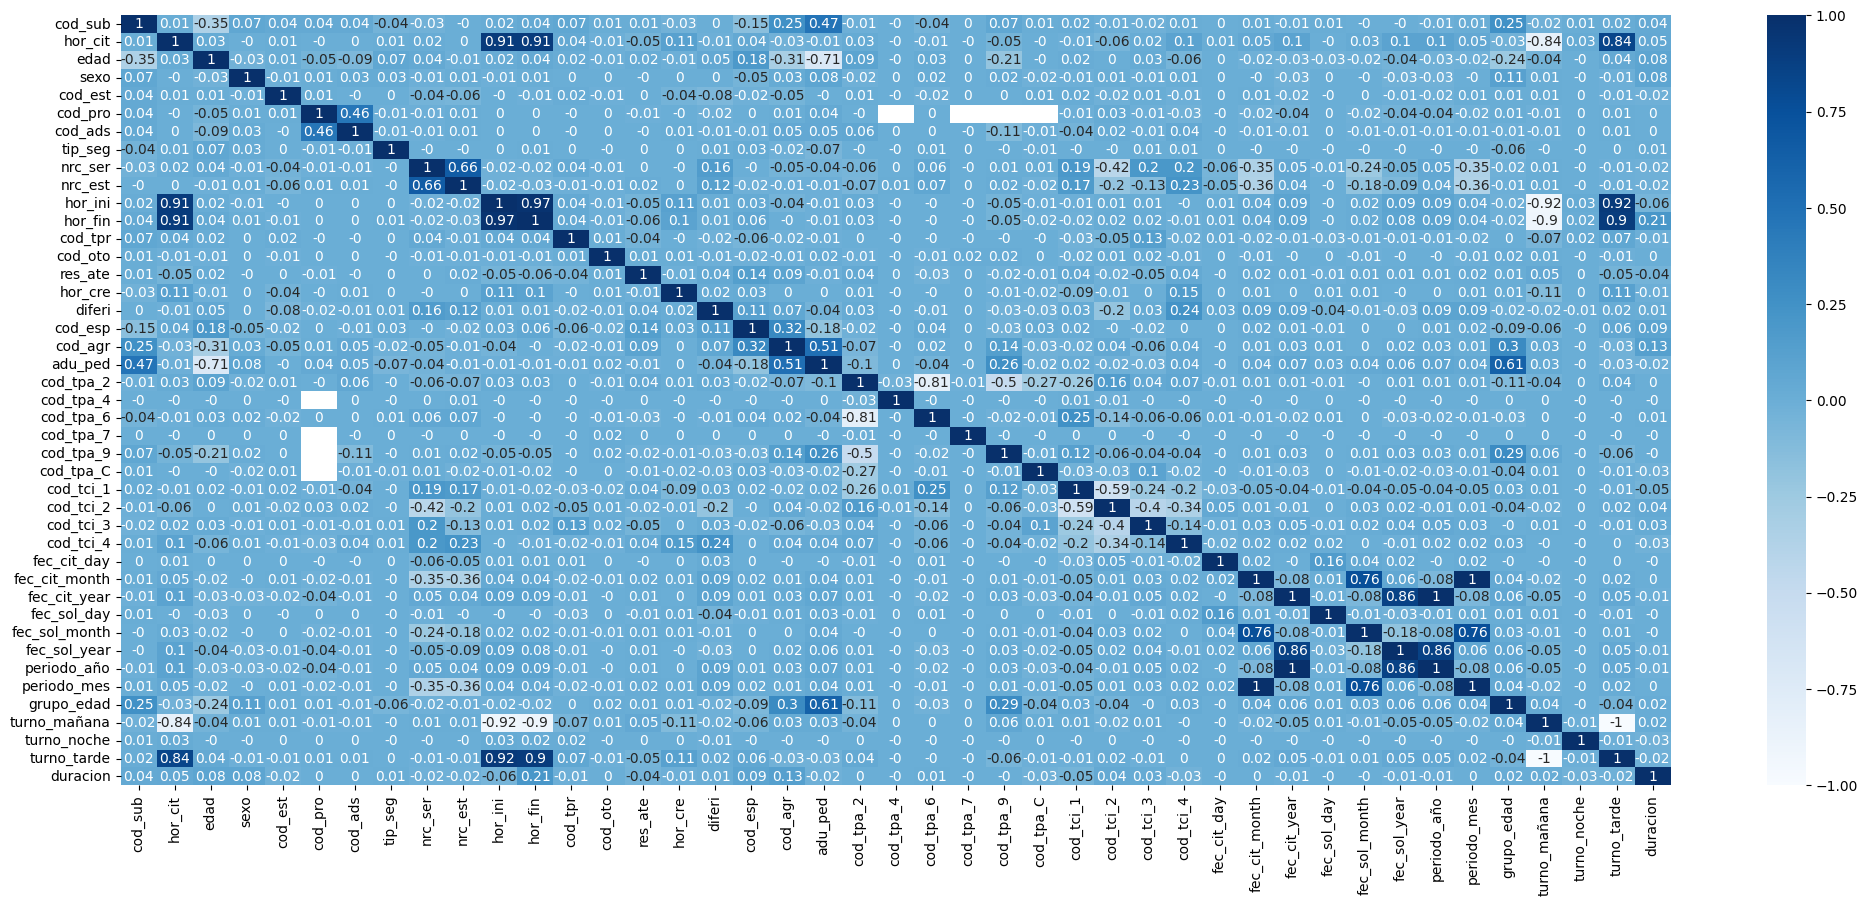

In [16]:
# Vemos la correlacion entre variables
correlacion=df.corr().round(2)
fig, ax = plt.subplots(figsize=(25,10))
ax=sns.heatmap(correlacion, annot=True,cmap="Blues")

In [17]:
# Eliminamos columnas que no aportan informacion
df = df.drop(['periodo_año','periodo_mes'], axis=1)
df = df.drop(['res_ate'], axis=1)
df = df.dropna(subset=['fec_sol_day', 'fec_sol_month', 'fec_sol_year'])
df = df.dropna(subset=['cod_pro'])

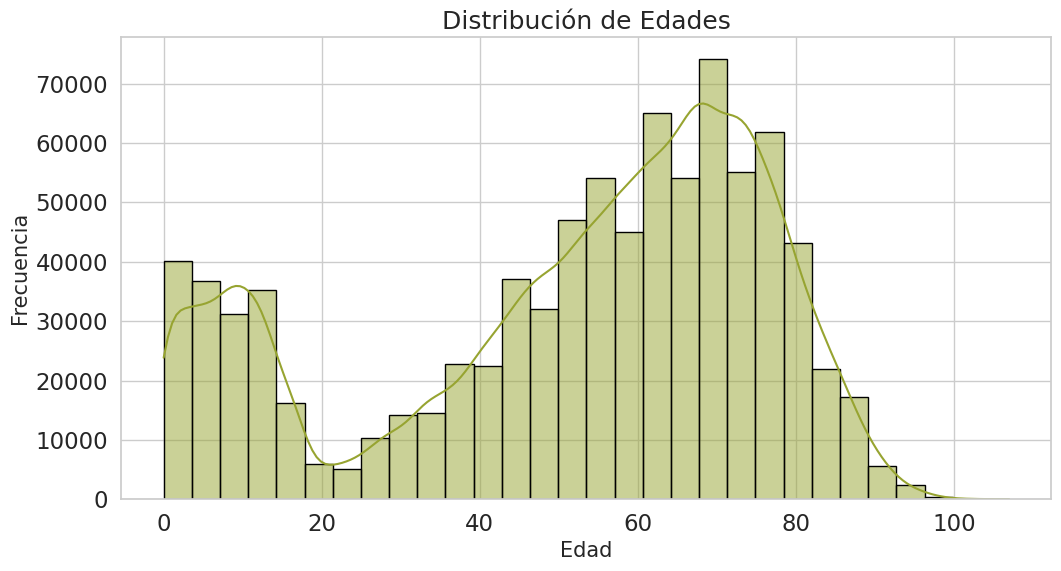

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo y el contexto para hacer los gráficos más bonitos
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Crear una paleta de colores personalizada
palette = sns.color_palette("husl", 8)

# Crear la figura
plt.figure(figsize=(12, 6))

# Crear el histograma
sns.histplot(df['edad'], bins=30, edgecolor='black', color=palette[2], kde=True)

# Añadir títulos y etiquetas
plt.title('Distribución de Edades', fontsize=18)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

# Mostrar el gráfico
plt.show()


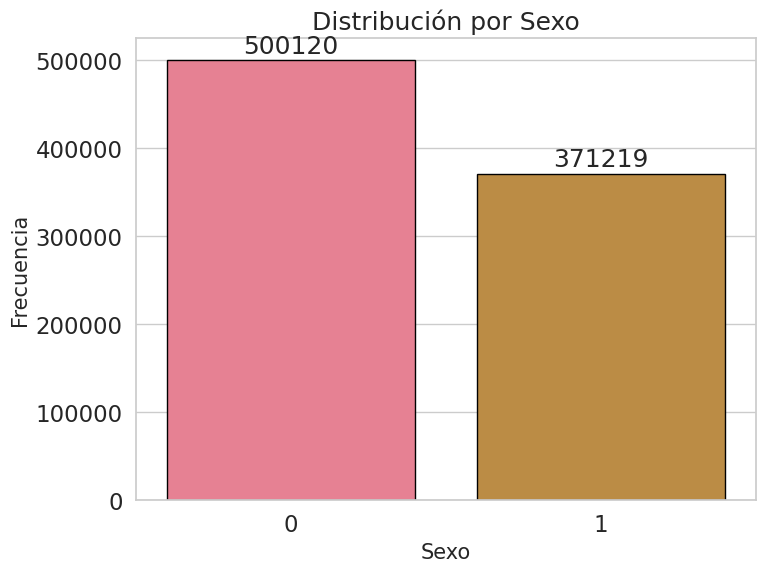

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo y el contexto para hacer los gráficos más bonitos
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Crear una paleta de colores personalizada
palette = sns.color_palette("husl", 8)

# Crear la figura
plt.figure(figsize=(8, 6))

# Crear el gráfico de barras
ax = sns.countplot(x='sexo', data=df, palette=palette, edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Distribución por Sexo', fontsize=18)
plt.xlabel('Sexo', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

# Añadir las frecuencias encima de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Mostrar el gráfico
plt.show()


df['cod_tpa'].value_counts().plot(kind='bar')
plt.title('Distribución de Tipos de Pacientes')
plt.xlabel('Tipo de Paciente')
plt.ylabel('Frecuencia')
plt.show()


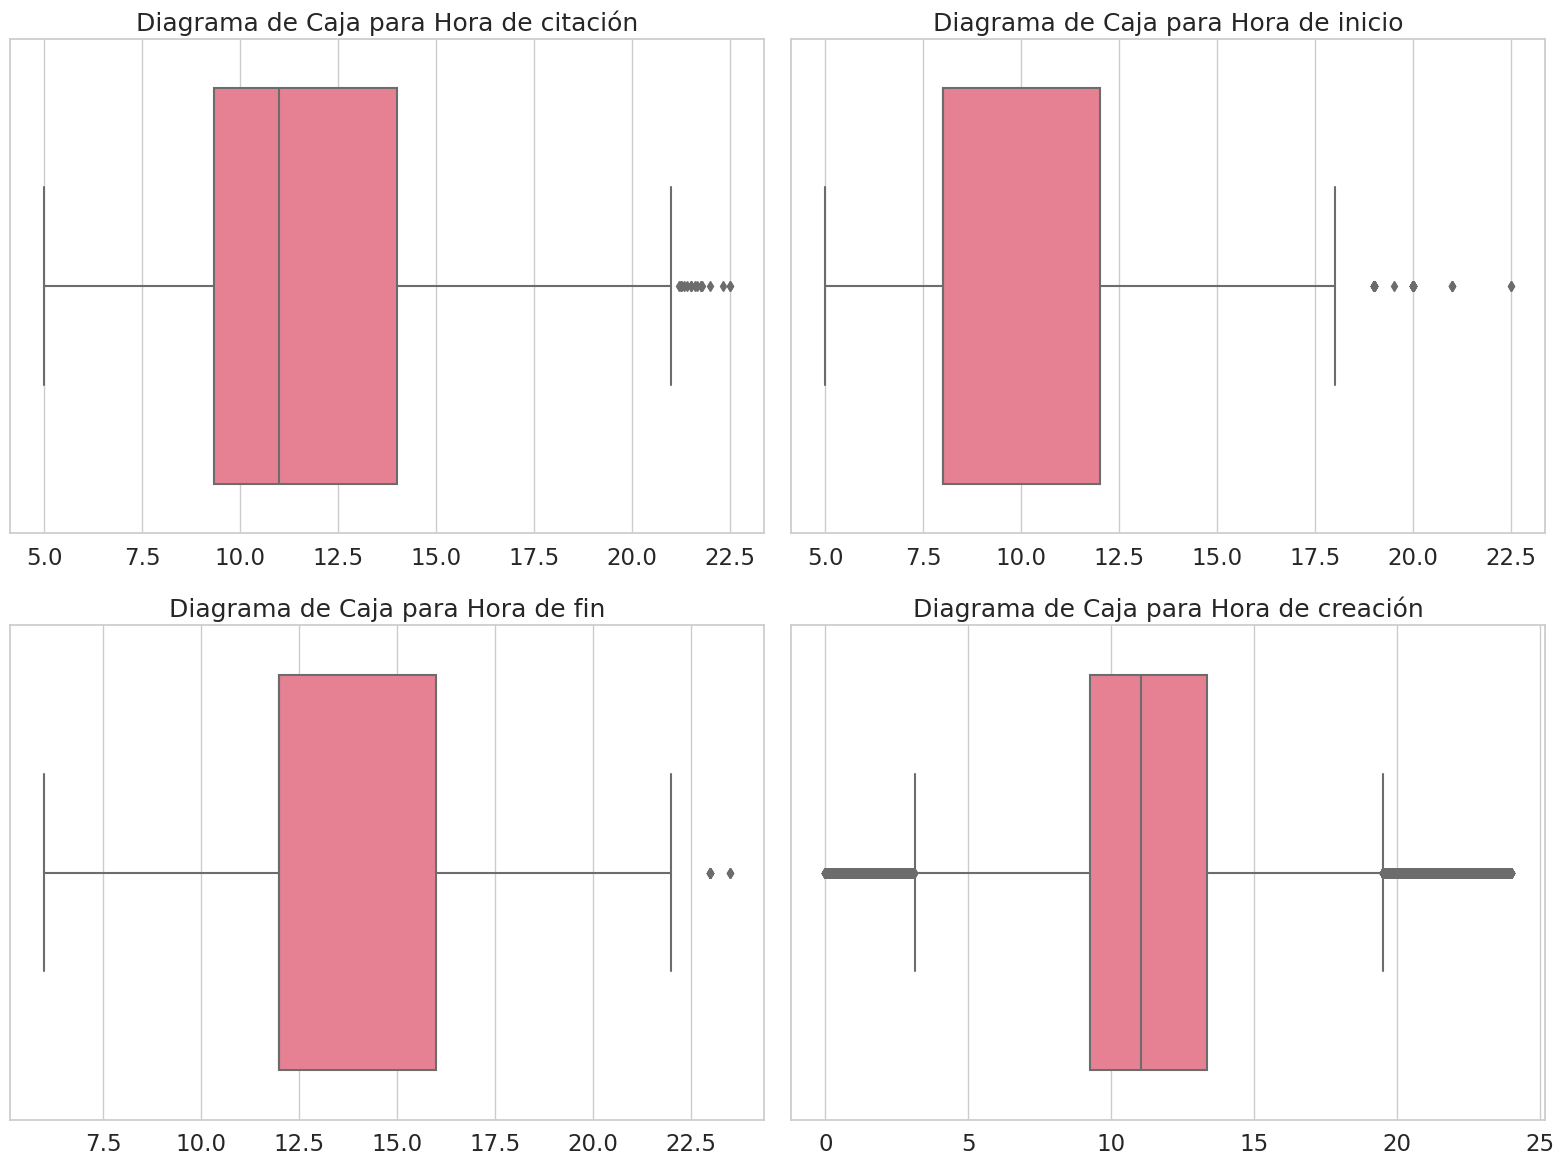

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo y el contexto para hacer los gráficos más bonitos
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Crear una paleta de colores personalizada
palette = sns.color_palette("husl", 8)

# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Lista de títulos
titles = ['Hora de citación', 'Hora de inicio', 'Hora de fin', 'Hora de creación']

# Hacer un boxplot para cada columna
for ax, column, title in zip(axs.flatten(), ['hor_cit', 'hor_ini', 'hor_fin', 'hor_cre'], titles):
    sns.boxplot(x=df[column], palette=palette, ax=ax)
    ax.set_title(f'Diagrama de Caja para {title}', fontsize=18)
    ax.set_xlabel('')  # Eliminar el nombre de la columna como etiqueta del eje x

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


df['turno'].value_counts().plot(kind='bar')
plt.title('Distribución de Turnos')
plt.xlabel('Turno')
plt.ylabel('Frecuencia')
plt.show()


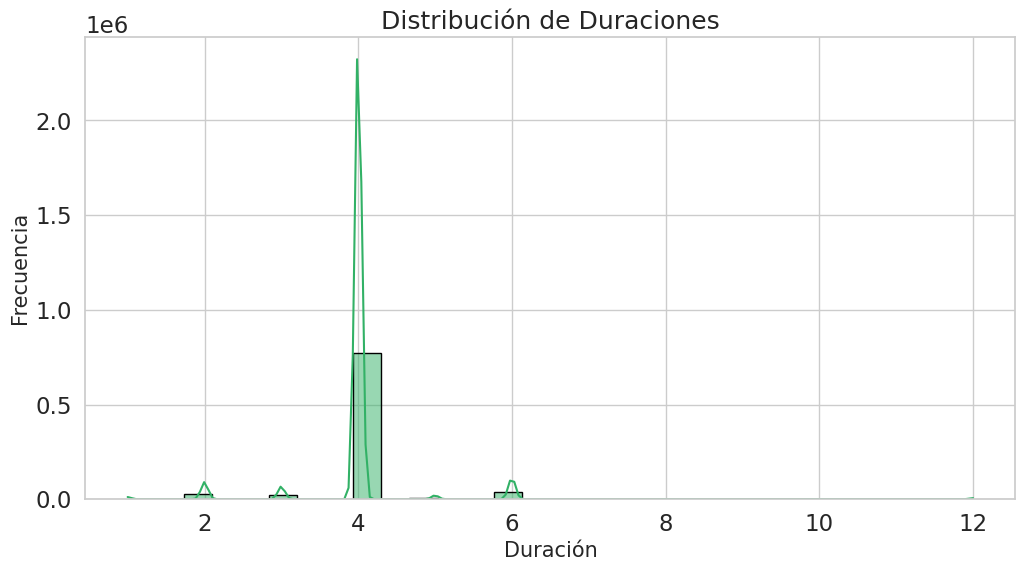

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo y el contexto para hacer los gráficos más bonitos
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Crear una paleta de colores personalizada
palette = sns.color_palette("husl", 8)

# Crear la figura
plt.figure(figsize=(12, 6))

# Crear el histograma
sns.histplot(df['duracion'], bins=30, edgecolor='black', color=palette[3], kde=True)

# Añadir títulos y etiquetas
plt.title('Distribución de Duraciones', fontsize=18)
plt.xlabel('Duración', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

# Mostrar el gráfico
plt.show()


In [22]:
# Establecemos la variable objetivo
y=df["cod_est"]
X=df.drop("cod_est", axis=1)


#### **SEPARANDO DATA Y REALIZANDO SAMPLING COMBINADO PARA EVITAR EL DESBALANCEO DE CLASES**

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Definiendo la estrategia de remuestreo
over = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.8)
# Definiendo la pipeline
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Aplicando la pipeline al conjunto de entrenamiento
X_train, y_train = pipeline.fit_resample(X_train, y_train)

# Verificando los cambios
print(y_train.value_counts())



1    332028
0    265623
Name: cod_est, dtype: int64


#### **ENTRENAMIENTO DEL MODELO**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Division de los datos en conjunto de prueba y entrenamiento
reg = LogisticRegression(max_iter=10000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
# Calculo de la precision
ACC_ANTES = (accuracy_score(y_test, y_pred))
print("ACURACCY: "+str(ACC_ANTES))

ACURACCY: 0.6980398007666353


/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### **SELECCION DE CARACTERISTICAS CON LASSO REGRESION**

In [25]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# Uso de LassoCV para seleccionar variables
reg_lasso = LassoCV(cv=5)
reg_lasso.fit(X_train, y_train)

# Selección de variables significativas
coef = pd.Series(reg_lasso.coef_, index = X_train.columns)
LASSO_VARS = coef[coef!=0].index.tolist()
print("VARIABLES SELECCIONADAS POR LASSO REGRESIÓN: ",LASSO_VARS)

# Uso de las variables seleccionadas para entrenamiento
X_train_l = X_train[LASSO_VARS]
X_test_l = X_test[LASSO_VARS]

# Entrenamiento de un modelo de regresión logística con las variables seleccionadas
clf = LogisticRegression()
clf.fit(X_train_l, y_train)

# Predicciones en el conjunto de prueba y cálculo de la precisión
y_pred = clf.predict(X_test_l)
LASSO_ACC = accuracy_score(y_test, y_pred)
print("ACCURACY DESPUES DE LA SELECCIÓN DE VARIABLES POR LASSO REGRESIÓN: ", LASSO_ACC)

# Decidir qué variables usar y reentrenar el modelo en base a eso
if LASSO_ACC>ACC_ANTES:
    X_train = X_train_l
    X_test = X_test_l
    print("SE CAMBIA EL ACCURACY ANTERIOR")
else:
    print("SE MANTIENE EL ACCURACY ANTERIOR")

# Reentrenamiento del modelo con las variables seleccionadas (o no, dependiendo de la precisión)
reg = LogisticRegression(max_iter=10000)
reg.fit(X_train, y_train)


VARIABLES SELECCIONADAS POR LASSO REGRESIÓN:  ['cod_sub', 'edad', 'cod_pro', 'tip_seg', 'hor_cre', 'diferi', 'cod_agr', 'fec_cit_day', 'fec_cit_month', 'fec_sol_day']


/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY DESPUES DE LA SELECCIÓN DE VARIABLES POR LASSO REGRESIÓN:  0.6793291558595573
SE MANTIENE EL ACCURACY ANTERIOR


/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

#### **SELECCION DE CARACTERISTICAS MEDIANTE RFE**

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# CREAMOS UN OBJETO DE REGRESIÓN LOGÍSTICA
modelo = LogisticRegression(max_iter=10000)

Lista_Accuracy = []
Posicion_Accuracy = []
elementos = len(X.columns)


# COMENZAREMOS A ITERAR PARA VER CON QUE CANTIDAD DE VARIABLES SE TIENE EL MEJOR ACCURACY
for i in range(elementos):
    # CREAMOS UN OBJETO RFE PARA SELECCIONAR n CARACTERÍSTICAS
    rfe = RFE(modelo, n_features_to_select=i+1)

    # AJUSTAMOS EL MODELO RFE AL CONJUNTO DE DATOS
    X_rfe_train = rfe.fit_transform(X_train, y_train)
    X_rfe_test = rfe.transform(X_test)
    
    # ENTRENAMOS EL NUEVO MODELO
    modelo.fit(X_rfe_train, y_train)
    y_pred = modelo.predict(X_rfe_test)
    accuracy = accuracy_score(y_test, y_pred)
    Lista_Accuracy.append(accuracy)
    print("Con "+str(i+1)+" variables se obtiene un Accuracy de "+str(accuracy))
    Posicion_Accuracy.append(i+1)

posicion = pd.Series(Lista_Accuracy).idxmax()
ACURACCY_RFE = max(Lista_Accuracy)
cant_var_usar = Posicion_Accuracy[posicion]

# ESTA VEZ APLICAREMOS OTRA VEZ RFE PERO PARA PODER EXTRAER LAS VARIABLES A FILTRAR
rfe = RFE(modelo, n_features_to_select=cant_var_usar)
X_rfe = rfe.fit_transform(X_train, y_train)
cabeceras_nuevas = X.columns[(rfe.get_support())]

# APLICAMOS EL MODELO
reg = LogisticRegression(max_iter=10000)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
ACC_NUEVO = accuracy_score(y_test, y_pred)

print("LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE: ", cant_var_usar)
print("VARIABLES SELECCIONADAS POR RFE: ", cabeceras_nuevas)
print("ACURACCY DESPUES DEL RFE: "+str(ACC_NUEVO))


#### **EVALUACIÓN DEL MODELO**

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Calculo de la precision
ACC_ANTES = (accuracy_score(y_test, y_pred))
print("ACURACCY: "+str(ACC_ANTES))

# Matriz de confusión
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print("Classification Report: ")
print(classification_report(y_test, y_pred))

# AUC-ROC score
y_scores = reg.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_scores[:, 1])
print("AUC-ROC Score: ")
print(roc_auc)

ACURACCY: 0.6793291558595573
Confusion Matrix: 
[[ 14916  56793]
 [ 27031 162662]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.36      0.21      0.26     71709
           1       0.74      0.86      0.80    189693

    accuracy                           0.68    261402
   macro avg       0.55      0.53      0.53    261402
weighted avg       0.64      0.68      0.65    261402

AUC-ROC Score: 
0.5683033909075927


#### **VALIDACION**

In [27]:
from sklearn.model_selection import cross_val_score

# Realiza la validación cruzada. El parámetro 'cv' determina el número de pliegues.
scores = cross_val_score(reg, X_train, y_train, cv=5)

print('Puntajes de la validación cruzada: ', scores)
print('Puntaje medio de la validación cruzada: ', scores.mean())


/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Puntajes de la validación cruzada:  [0.56050732 0.56031122 0.56298001 0.79045428 0.82002008]
Puntaje medio de la validación cruzada:  0.6588545795912054


/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### **HIPERPARAMETRIZACION**

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir los parámetros para la búsqueda
param_grid = {
    'C': np.logspace(-4, 4, 20),  # valores de regularización
    'penalty': ['l1', 'l2'],      # tipos de regularización
    'solver': ['saga']       # solver que soporta tanto l1 como l2
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# Ajustar los datos
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Fitting 5 folds for each of 40 candidates, totalling 200 fits


/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ugadingenieria01/.local/

Best parameters: {'C': 1438.4498882876599, 'penalty': 'l2', 'solver': 'saga'}
Best score: 0.6032130289922025


/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [29]:
best_params = grid_search.best_params_
best_C = best_params['C']
best_penalty = best_params['penalty']

#### **ENTRENAMIENTO POST HIPERPARAMETRIZACION**

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Crear y entrenar el modelo con los mejores parámetros
best_model = LogisticRegression(C=best_C, penalty=best_penalty, solver='saga', max_iter=10000)
best_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### **EVALUACIÓN POST HIPERPARAMETRIZACION**

In [31]:
# Calcular métricas de evaluación
ACC_DESPUES = (accuracy_score(y_test, y_pred))
print("ACURACCY: "+str(ACC_DESPUES))

# Crear la matriz de confusión
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(confusion_matrix)

# Crear el reporte de clasificación
classification_report = classification_report(y_test, y_pred)
print("Classification Report: ")
print(classification_report)

# Calcular el área bajo la curva ROC
roc_auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
print("AUC-ROC Score: ")
print(roc_auc_score)

ACURACCY: 0.7128790139325636
Confusion Matrix: 
[[  6290  65419]
 [  9635 180058]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.39      0.09      0.14     71709
           1       0.73      0.95      0.83    189693

    accuracy                           0.71    261402
   macro avg       0.56      0.52      0.49    261402
weighted avg       0.64      0.71      0.64    261402

AUC-ROC Score: 
0.5786964847391848


#### **VALIDACION POST HIPERPARAMETRIZACION**

In [32]:
from sklearn.model_selection import cross_val_score

# Realiza la validación cruzada. El parámetro 'cv' determina el número de pliegues.
scores = cross_val_score(reg, X_train, y_train, cv=5)

print('Puntajes de la validación cruzada: ', scores)
print('Puntaje medio de la validación cruzada: ', scores.mean())


/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Puntajes de la validación cruzada:  [0.56050732 0.56031122 0.56298001 0.79045428 0.82002008]
Puntaje medio de la validación cruzada:  0.6588545795912054


/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### RECOMENDACIONES:

- MEJOR EDA
